In [1]:
import datasets
ds = datasets.load_dataset("Asap7772/code_contests_llamasft1e-5_mc_passk-part1-of-1_graded")

/home/anikaitsingh/miniconda3/envs/rlhf/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating train split: 100%|██████████| 102/102 [00:00<00:00, 174.69 examples/s]


In [2]:
all_scores = ds['train']['is_corrects']

In [11]:
import random
import numpy as np

pass_k_so_far = np.array([0.] * len(all_scores[0]))
print(len(all_scores))
for i in range(len(all_scores)):
    num_shuffles = len(all_scores[i])
    aggr = [[0] * len(all_scores[i]) for _ in range(num_shuffles)]
    for j in range(num_shuffles):
        random.shuffle(all_scores[i])
        is_correct_so_far = False
        for k in range(len(all_scores[i])):
            is_correct_so_far = is_correct_so_far or all_scores[i][k]
            aggr[j][k] += int(is_correct_so_far)
    aggr = np.array(aggr)
    aggr = np.mean(aggr, axis=0)
    pass_k_so_far += aggr



102


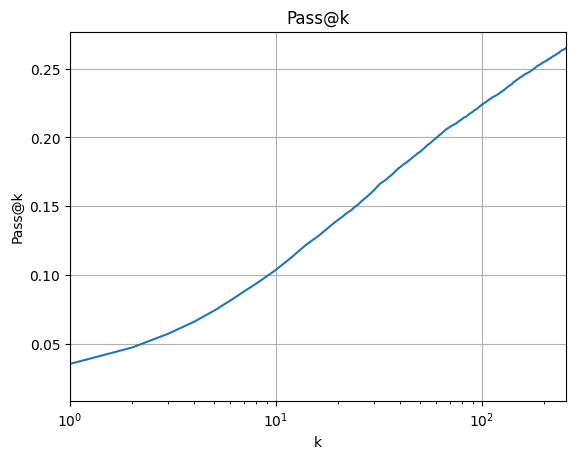

In [13]:
import matplotlib.pyplot as plt
import numpy as np
arr = np.array(pass_k_so_far) / len(all_scores)
plt.plot(arr)
plt.xlabel('k')
plt.ylabel('Pass@k')
plt.title('Pass@k')
plt.xscale('log', base=10)
plt.xlim(1, len(arr))
plt.grid()
plt.show()